In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
random.seed(404)

## Задание

Рассмотреть выборки данных с помощью boxplot (т.е. найти коэф - медиану, среднее, отклонение, размах): 
1. [0, 16000] - сырой датасет (из `get_dataset.py`)
2. данные после mfcc (из `get_dataset.py`). 
3. `dat` из `eval_quantized_model.py`
4. `dat_q` из `eval_quantized_model.py`

#### Функции для анализа

In [2]:
from typing import List, Any

In [3]:
def get_metrics(data: np.ndarray) -> None:
    data = pd.Series(data)
    print('median:', data.median())
    print('std:', data.std())
    print('min:', data.min()) 
    print('max:', data.max())

In [4]:
def open_file(filename: str) -> Any:
    with open(f'{filename}.pickle', 'rb') as handle:
        data = pickle.load(handle)
    return data

In [5]:
def concat(data: List, samples: int=0) -> np.ndarray:
    if samples != 0:
        random.shuffle(data)
        arr = np.concatenate(data[:samples],axis=0)
    else:
        arr = np.concatenate(data,axis=0)
        
    print('Previous data shape:', arr.shape)
    while len(arr.shape) > 2:
        arr = np.concatenate(arr,axis=0)
    print('Current data shape', arr.shape)  

    return arr.reshape((arr.shape[0],))

### 1. Сырой датасет

In [16]:
ds_train_1 = open_file('ds_train_1')

Вот так выглядит распределение одного образца:

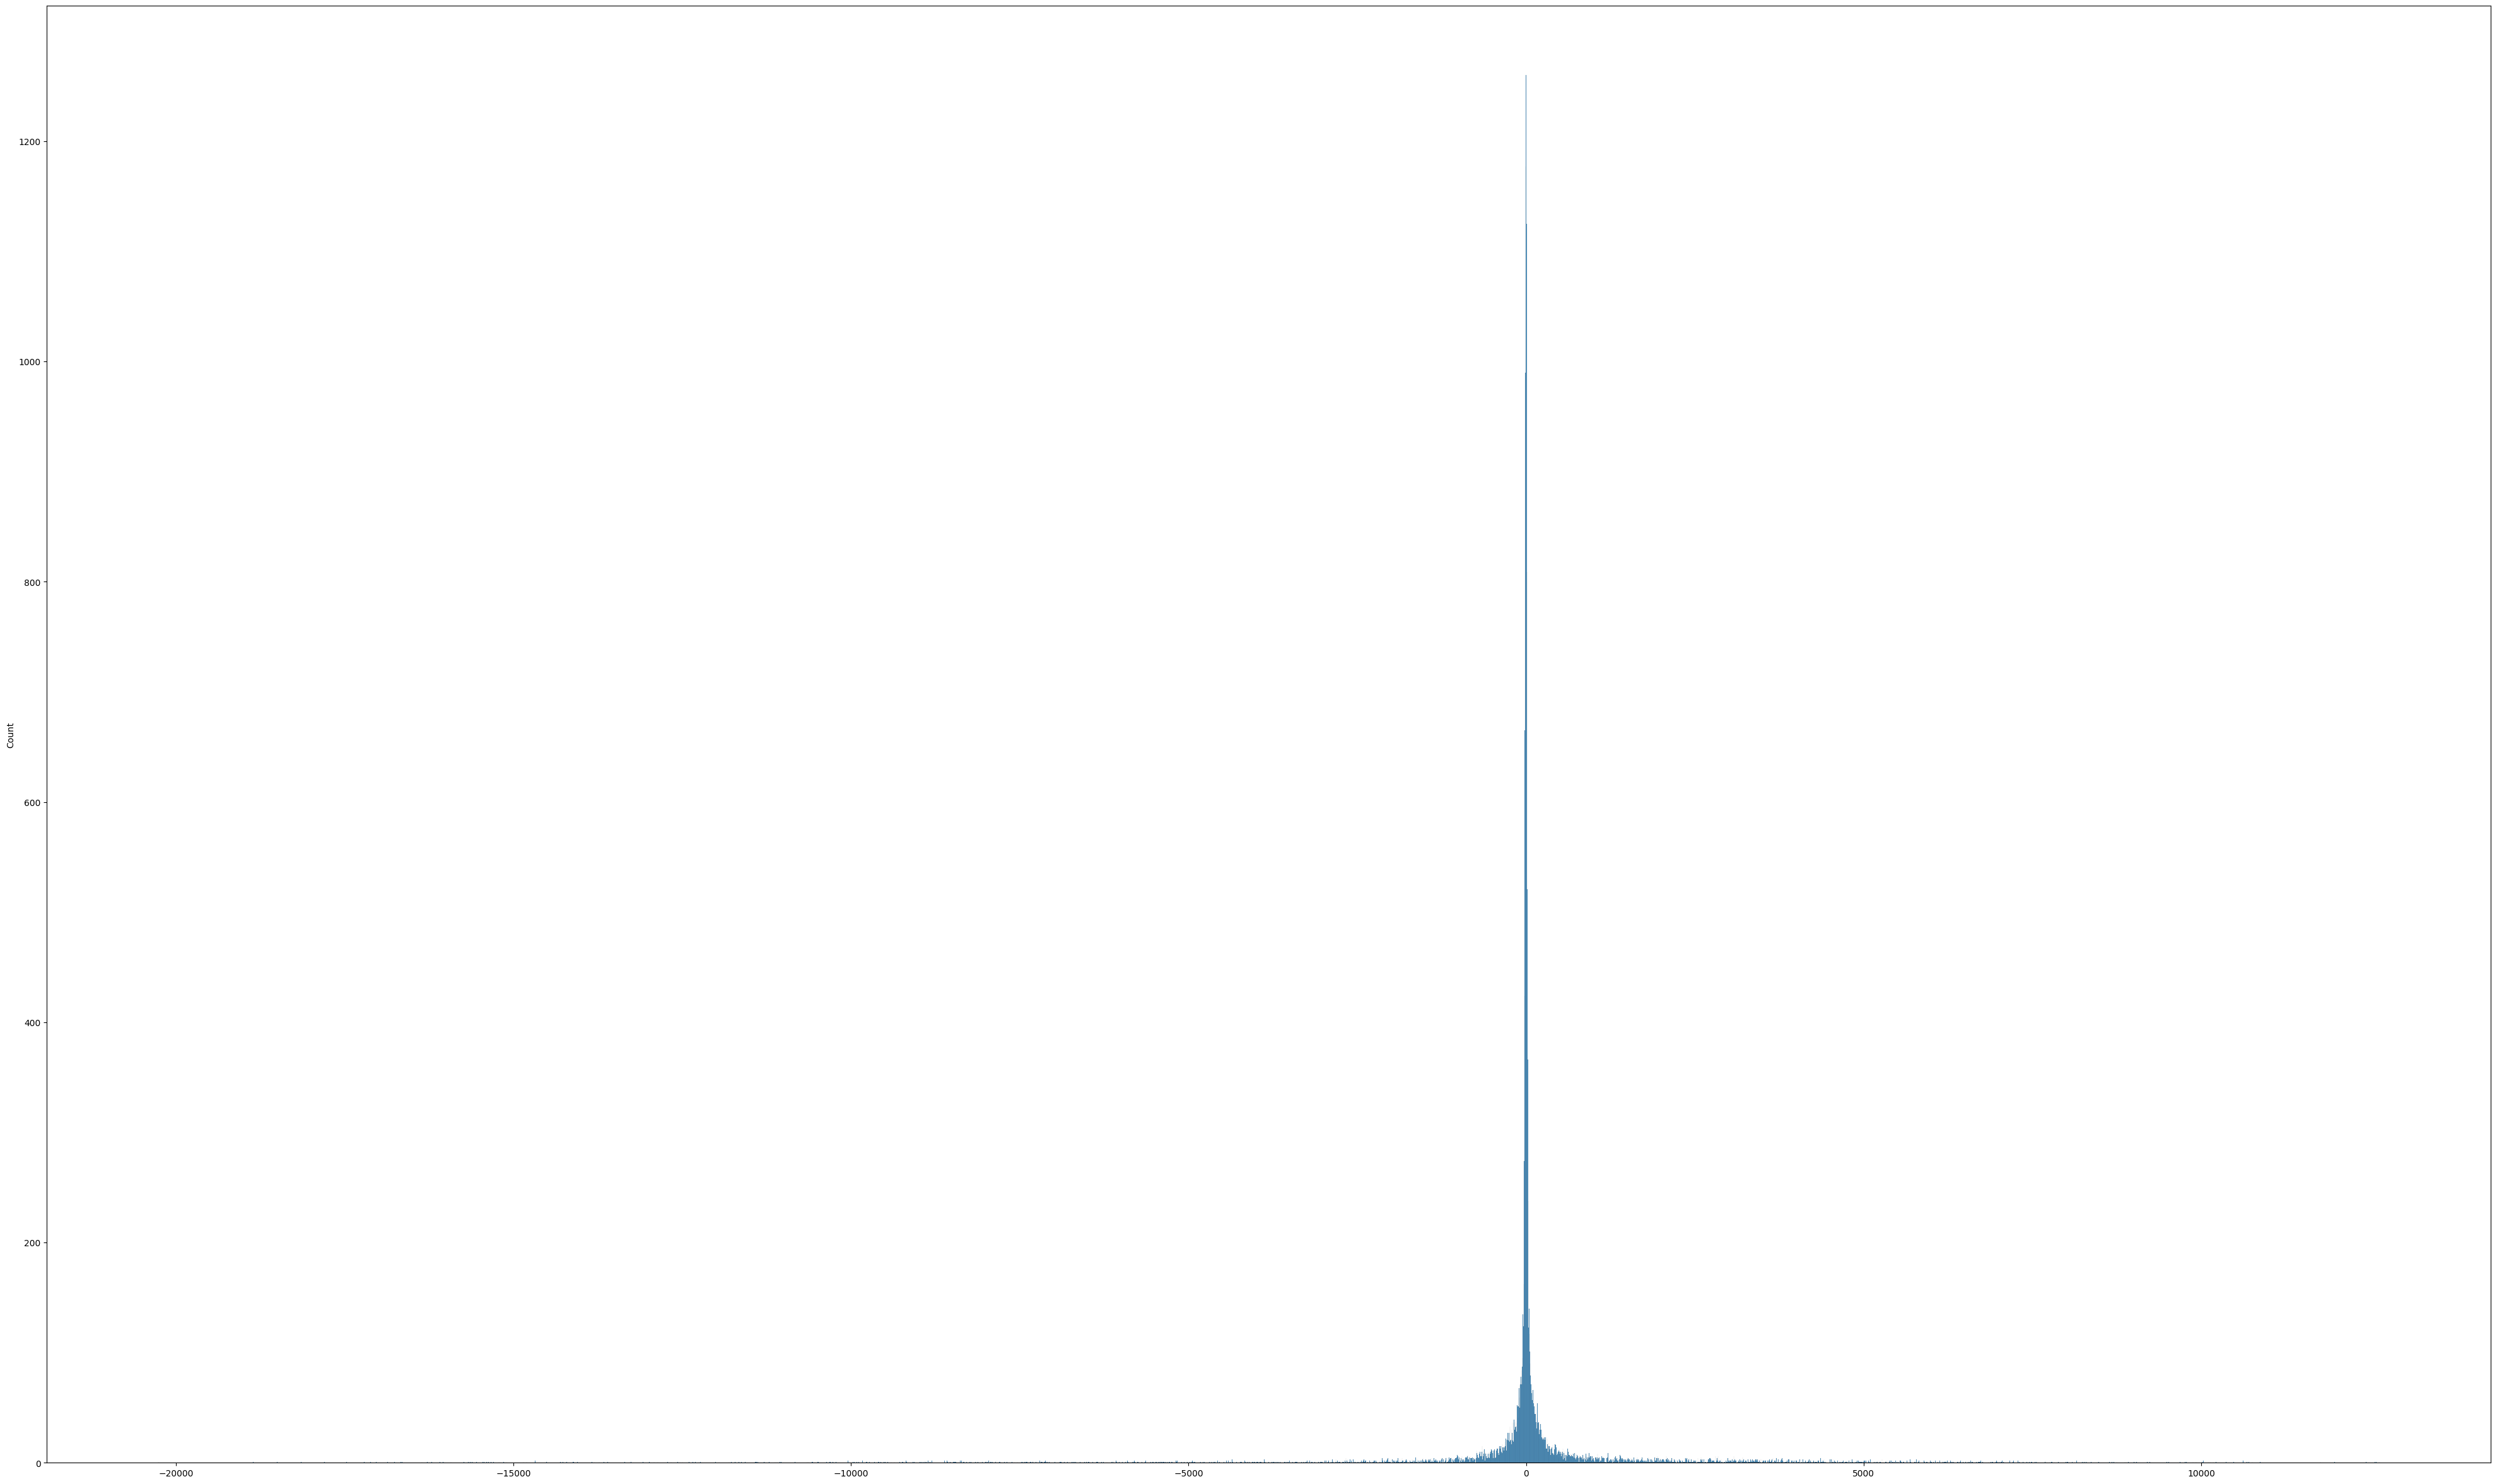

In [10]:
plt.figure(figsize=(50,30))
sns.histplot(x=ds_train_1[0]);

median: 0.0
std: 2444.325299572718
min: -32768
max: 32767


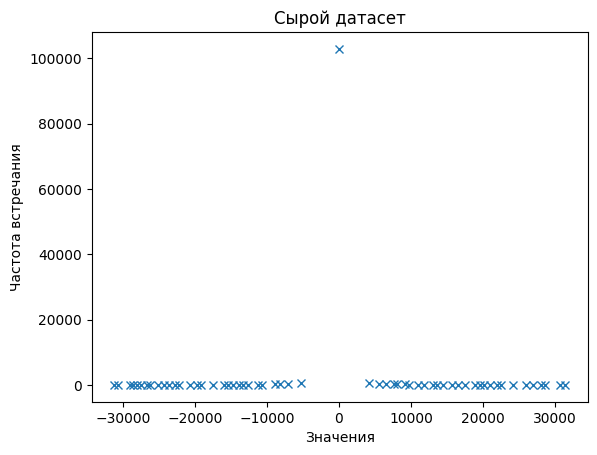

In [48]:
hist, bin_edges = np.histogram(arr, 250)
peaks, _ = find_peaks(hist)
plt.plot(bin_edges[peaks], hist[peaks], "x");
plt.title("Сырой датасет")
plt.xlabel("Значения")
plt.ylabel("Частота встречания")
get_metrics(arr)

Обрезанная гистограмма

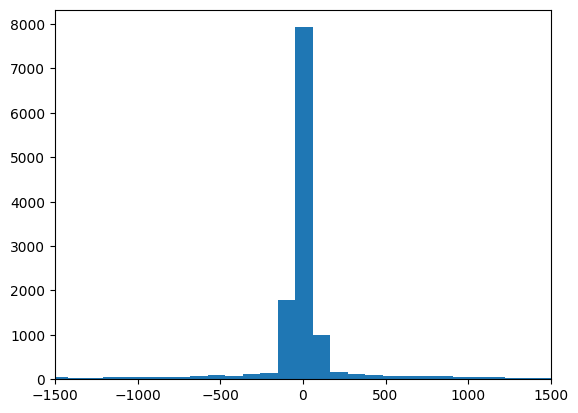

In [28]:
plt.hist(x=ds_train_1[0], bins=300)
plt.xlim(-1500, 1500);

### 2. После mfcc

In [6]:
ds_train_2 = open_file('ds_train_2')

Распределение одного образца из датасета:

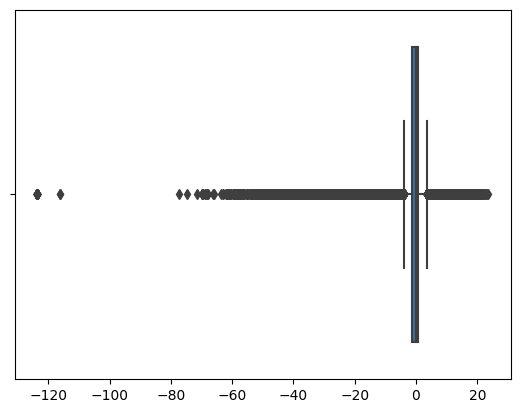

In [28]:
sns.boxplot(x=ds_train_2[0]);

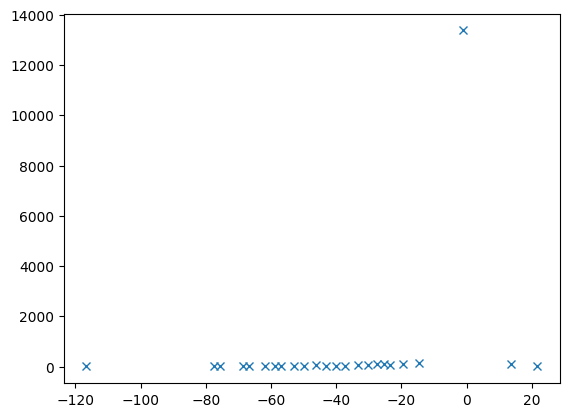

In [29]:
hist, bin_edges = np.histogram(ds_train_2[0], 150)
peaks, _ = find_peaks(hist)
plt.plot(bin_edges[peaks], hist[peaks], "x")

In [7]:
arr_2_20 = concat(ds_train_2, 20)
arr_2 = concat(ds_train_2)

Previous data shape: (2000, 49, 10, 1)
Current data shape (980000, 1)
Previous data shape: (85511, 49, 10, 1)
Current data shape (41900390, 1)


median: -0.1264165
std: 9.417766
min: -123.569725
max: 43.66766


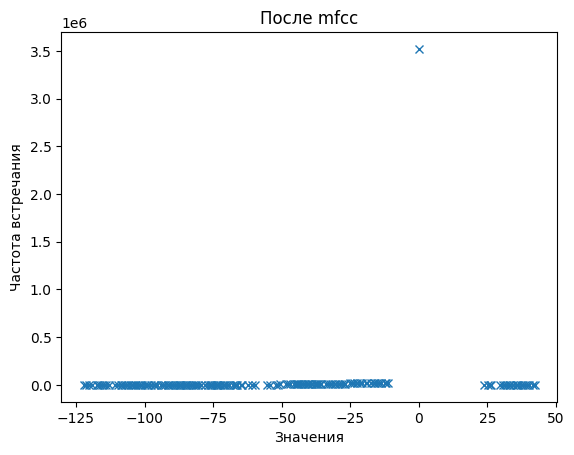

In [58]:
hist, bin_edges = np.histogram(arr_2, 700)
peaks, _ = find_peaks(hist)
plt.plot(bin_edges[peaks], hist[peaks], "x");
plt.title("После mfcc")
plt.xlabel("Значения")
plt.ylabel("Частота встречания")
get_metrics(arr_2)

median: -0.1264165
std: 9.417766
min: -123.569725
max: 43.66766


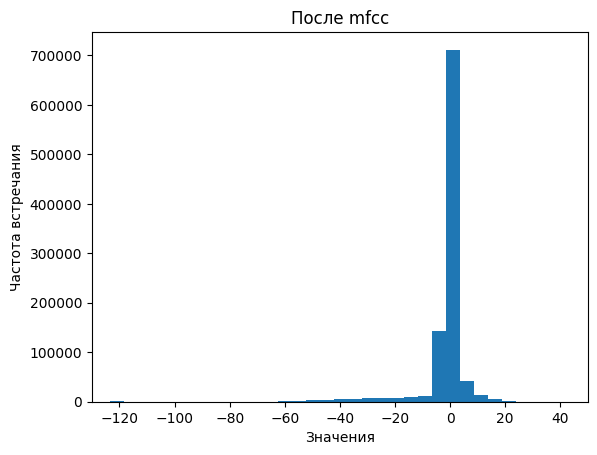

In [8]:
plt.hist(x=arr_2_20, bins=30)
plt.xlim(-130, 50)
plt.title("После mfcc")
plt.xlabel("Значения")
plt.ylabel("Частота встречания");
get_metrics(arr_2)

### 3. `dat` из `eval_quantized_model.py`

In [44]:
dat_3 = open_file('dat_3')

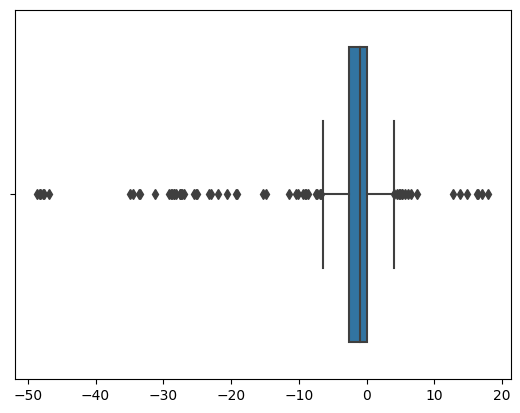

In [45]:
sns.boxplot(x=dat_3[0]);

In [47]:
arr_3 = concat(dat_3)
get_metrics(arr_3)

Previous data shape: (4890, 49, 10, 1)
Current data shape (2396100, 1)
median: -0.11196774
std: 8.977561
min: -123.569725
max: 30.003954


### 4. `dat_q` из `eval_quantized_model.py`

In [9]:
dat_q_4 = open_file('dat_q_4')

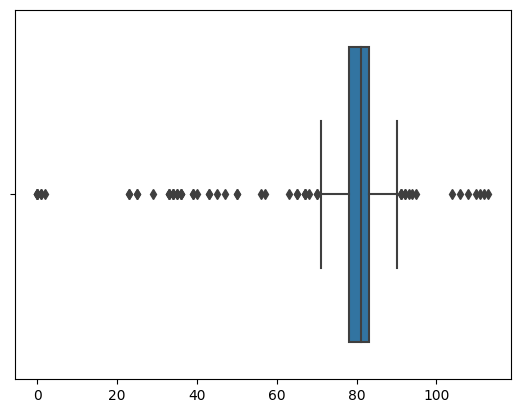

In [49]:
sns.boxplot(x=dat_q_4[0]);

In [10]:
arr_4 = concat(dat_q_4)
get_metrics(arr_4)

Previous data shape: (4890, 49, 10, 1)
Current data shape (2396100, 1)
median: 82.0
std: 15.333926074721495
min: -128
max: 127


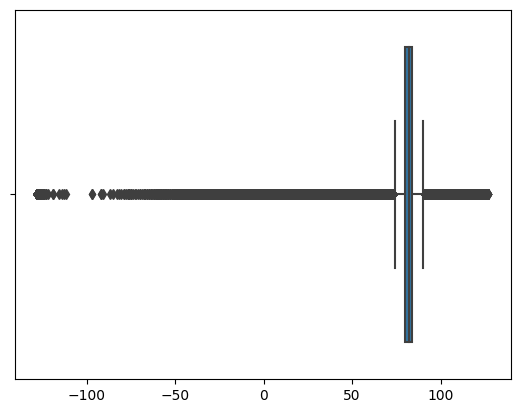

In [33]:
sns.boxplot(x=arr_4);

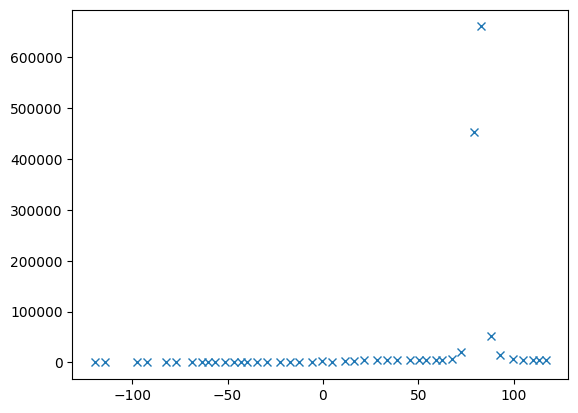

In [34]:
hist, bin_edges = np.histogram(arr_4, 150)
peaks, _ = find_peaks(hist)
plt.plot(bin_edges[peaks], hist[peaks], "x");

median: 82.0
std: 15.333926074721495
min: -128
max: 127


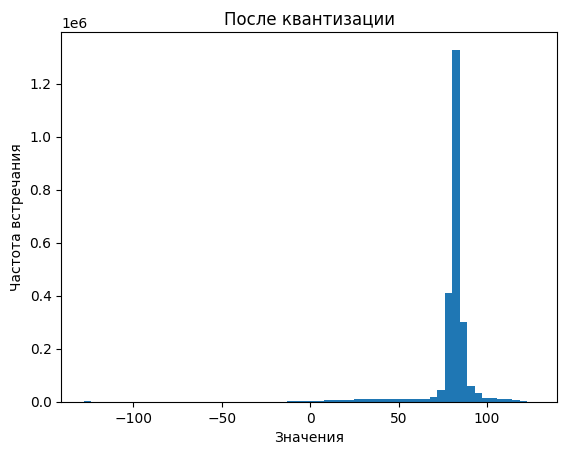

In [14]:
plt.hist(x=arr_4, bins=60)
# plt.xlim(-130, 50)
plt.title("После квантизации")
plt.xlabel("Значения")
plt.ylabel("Частота встречания");
get_metrics(arr_4)

## Вывод

| Metrics| #1 unprepared data | #2 after mfcc | #3 befor quant | #4 after quant |
|--------|:------------------:|:-------------:|:--------------:|:--------------:|
| median |                0.0 |    -0.1264165 |    -0.11196774 |           82.0 |
| std    |         2444.32529 |      9.417766 |       8.977561 |     15.3339260 |
| min    |             -32768 |   -123.569725 |    -123.569725 |           -128 |
| max    |              32767 |      43.66766 |      30.003954 |            127 |

Образцы #2 и #3 - это тренировочные и тестовые данные после mfcc.